# Ⅲ. 통계적 실험과 유의성검정

In [1]:
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. A/B 검정
---
- **처리(treatment)**: 어떤 대상에 주어지는 특별한 환경이나 조건
- **처리군(treatment group)**: *특정 처리에 노출된* 대상들의 집단
- **대조군(control group)**: *어떤 처리도 하지 않은* 대상들의 집단
- **임의화(= 랜덤화, randomization)**: 처리를 적용할 대상을 임의로 결정하는 과정
- **대상(subject)**: 처리를 적용할 개체 대상
    - 유의어 - 피실험자
- **검정통계량(test statistic)**: 처리 효과를 측정하기 위한 지표

### A. 대조군은 왜 필요할까?

### B. 왜 하필 A/B일까? C, D, …가 아니라?

## 2. 가설검정
---
- **가설검정(hypothesis test)**
- **유의성검정(significance test)**
- **귀무가설(null hypothesis)**: *관찰한 효과가 우연 때문*이라는 가설
    - 유의어 - 영가설
- **대립가설(alternative hypothesis)**: *증명*하고자 하는 가설(귀무가설과의 대조)
- **일원검정(one-way test)**: 한 방향으로만 (우연히 일어날 확률을) 계산하는 가설검정
- **이원검정(two-way test)**: 양방향으로 (우연히 일어날 확률을) 계산하는 가설검정

```
※ 가설을 세워야 하는 이유

인간은 임의성을 과소평가하려는 경향이 있기 때문이다.
예를 들어 '흑고니'와 같은 예외적 사건을 예상하지 못하거나 무작위 사건에 과한 의미를 부여하는 경향을 들 수 있다.
```

```
※ 흑고니 이론?

흑조 이론, 블랙 스완 이론이라고도 불린다.
나심 탈레브가 2007년 블랙스완을 발간하면서 대중화되었다.
1. 예외적으로 일어나며 2. 일단 발생하면 파생 변화가 엄청나고 3. 발생 이후에는 사전에 예측할 수 있었다고 받아들이는 3가지 특징을 가진다.
```
[흑고니 이론](https://ko.wikipedia.org/wiki/%ED%9D%91%EA%B3%A0%EB%8B%88_%EC%9D%B4%EB%A1%A0)

### A. 귀무가설
---
가설검정의 최종 목적은 귀무가설이 틀렸다는 것을 입증하여 어떠한 차이 따위가 우연이 아니라고 말하는 것이다.

### B. 대립가설

### C. 일원/이원 가설검정
---
- 일원 가설검정(단측 검정을 말하는 듯): A/B 중에서 B가 A보다 낫다는 대립가설이 필요한 경우
    - 귀무가설: $\mu=\mu_0$
    - 대립가설: $\mu>\mu_0$ (or $\mu<\mu_0$)
- 이원 가설검정(양측 검정을 말하는 듯): A/B 중에서 A는 B와 다르며 더 크거나 작을 수 있는 경우
    - 귀무가설: $\mu=\mu_0$
    - 대립가설: $\mu≠\mu_0$

## 3. 재표본추출
---
- **순열검정(permutation test)**: 두 개 이상의 표본을 함께 결합하여 관측값들을 무작위로(또는 전부를) 재표본으로 추출하는 과정
    - 유의어 - 임의화검정, 임의순열검정, 정확검정
- **재표본추출**: 랜덤한 변동성을 알아보기 위해 관찰된 데이터로부터 반복적으로 표본추출하는 것
- **복원/비복원(with/witout replacement)**

### A. 순열검정
---
- permute(= "순서를 바꾸다")에서 파생
- 순열 절차
    1. 여러 그룹의 결과를 단일 데이터 집합으로 결합한다.
    1. 결합된 데이터를 잘 섞은 후, 그룹 A와 동일한 크기의 표본을 무작위 비복원 추출한다. (다른 그룹 일부 데이터 포함)
    1. 나머지 데이터에서 그룹 B와 동일한 크기의 표본을 무작위 비복원 추출한다.
    1. C, D 등의 그룹에 대해서도 동일한 작업을 수행한다.
    1. 원래 표본에 대해 구한 통계량 또는 추정치가 무엇이든, 지금 추출한 재표본에 대해 모두 다시 계산하고 기록한다.
    1. 앞선 단계들을 $R$번 반복하여 검정통계량의 순열분포를 얻는다.
- 결과 해석
    - 관찰된 차이가 순열로 보이는 차이보다 크거나 같은 비율 계산
    - 관찰된 차이가 순열로 보이는 차이의 집합 안에 있음 -> 우연히 일어날 수 있는 범위 안임
    - 관찰된 차이가 대부분 순열분포 바깥에 있음 -> 우연이 아니라고 결론내릴 수 있음 = 통계적으로 유의미하다(statistically significant)고 할 수 있음

### B. 예제: 웹 점착성
---
- **대리변수(proxy variable)**: (관심 변수를 직접 얻을 수 없거나, 측정하는 데 많은 비용이나 시간이 소요될 경우) 참된 관심 변수를 대신하는 변수

In [3]:
session_times = pd.read_csv('../data/web_page_data.csv')
session_times.Time = 100 * session_times.Time

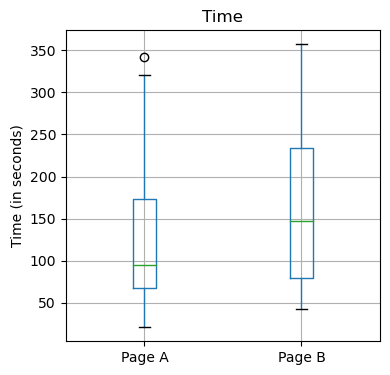

In [4]:
# 세션 시간 시각적 비교
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [5]:
# 평균 차이 계산
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [6]:
# 함수 정의
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

In [7]:
# 순열 검정 시행
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

4.123809523809513


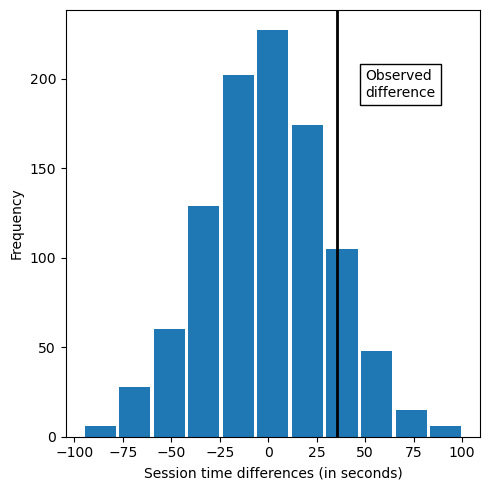

In [8]:
# 1000번 실행하여 히스토그램 시각화
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# 실제 차이를 넘어갈 확률
# convert perm_diffs to numpy array to avoid problems with some Python installations
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))

0.121


12.1%로 세션 시간의 차이가 확률분포의 범위 내에 있음을 의미함 -> 차이가 통계적으로 유의하지 않음

### C. 전체 및 부트스트랩 순열검정
---
- 순열검정의 두 가지 변종
    - 전체순열검정(exhausitive permutation test)
        - 데이터를 무작위로 섞고 나누는 대신 실제로 나눌 수 있는 모든 가능한 조합을 찾음
        - 샘플 크기가 비교적 작을 때만 실용적
        - 좀 더 정확한 결론을 보장 -> 정확검정(exact test)라고도 함
    - 부트스트랩 순열검정(bootstrap permutation test)
        - 무작위 순열검정의 2단계와 3단계의 비복원추출을 복원추출로 수행
        - 모집단에서 개체를 선택할 때 임의성을 보장할 뿐만 아니라, 개체가 처리군에 할당될 때에도 임의성 보장

### D. 순열검정: 데이터 과학의 최종 결론

## 4. 통계적 유의성과 p값
---
- **통계적으로 유의하다**: 결과가 우연히 벌어질 수 있는 변동성의 바깥에 존재한다
- **p 값(p-value)**: (귀무가설을 구체화한 기회 모델이 주어졌을 때) 관측된 결과와 같이 특이하거나 극단적인 결과를 얻을 확률
- **$\alpha$=alpha**: 실제 결과가 통계적으로 유의한 것으로 간주되기 위해, 우연에 의한 결과가 능가해야 하는 '비정상적인' 가능성의 임계 확률
- **제1종 오류(type Ⅰ error)**: 우연에 의한 효과를 실제 효과라고 잘못 결론 내리는 것
- **제2종 오류(type Ⅱ error)**: 실제 효과를 우연에 의한 효과라고 잘못 결론 내리는 것

Observed difference: 0.0368%


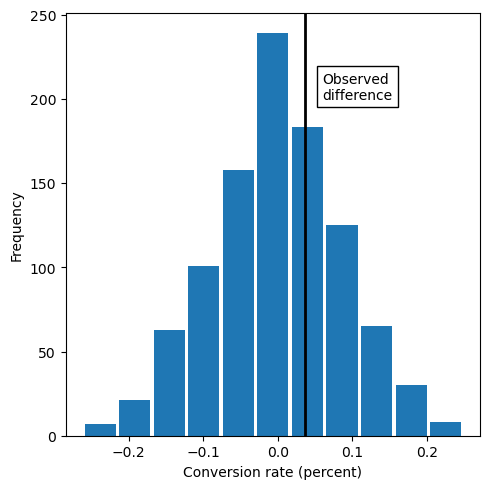

In [10]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588)
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

관측된 0.0368%의 차이는 랜덤 변이의 범위 내에 있음

### A. p 값
---
- 확률모형이 관측된 결과보다 더 극단적인 결과를 생성하는 빈도
- 순열검정의 결과 중에서 관찰된 차이와 같거나 더 큰 차이를 보이는 경우의 비율

In [11]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


In [12]:
# 가설이 이항분포를 따르므로 p 값을 정규근사함
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


### B. 유의수준

```
※ p 값의 진정한 의미

논문 통과만을 생각하다보면 '결과가 우연에서 비롯될 확률'이라고 잘못 해석할 수 있다.
'랜덤 모델이 주어졌을 때, 그 결과가 관찰된 결과보다 더 극단적인 확률'일 뿐이므로 p 값이 충분한 증거가 되기는 어렵다.
```

### C. 제1종과 제2종 오류
---
- 실제로 제2종 오류는 오류라기보단 '표본크기가 너무 작아 효과를 알아낼 수 없다고 판단'하는 것에 가깝다.
- 표본크기가 더 클수록 p 값이 더 작아지기 마련이므로, p 값의 유의수준에 미치지 못하는 경우 '효과가 아직 입증되지 않았다'에 가깝다.
- 유의성검정(가설검정)의 기본 목적에 따라 보통은 제1종 오류를 최소화하도록 설계한다.

### D. 데이터 과학과 p 값

## 5. t 검정
---
- 가장 자주 사용됨
- 1920년대와 1930년대 재표본 검정을 대체하기 위한 좋은 근사로써 사용
- <ins>데이터가 수치형인 아주 일반적인 2표본 비교(A/B 검정)에 주로 사용</ins>
---
- **검정통계량(test statistic)**: 관심의 차이 또는 효과에 대한 측정 지표
- **t 통계량(t-statistic)**: 평균처럼, *표준화*된 형태의 *일반적*인 검정통계량
- **t 분포(t-distribution)**: 관측된 t 통계량을 비교할 수 있는 기준분포 (귀무가설에서 파생)

In [13]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [14]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time,
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


## 6. 다중검정
---
- **거짓 발견 비율(FDR, false discovery rate)**: 다중검정에서 *제1종 오류가 발생*하는 비율
- **alpha infaltion**: *제1종 오류를 만들 확률이 알파가 더 많은 테스트를 수행할수록 증가*하는 다중검정 현상
- **p 값 조정(adjustment of p-value)**: 동일한 데이터에 대해 다중검정을 수행하는 경우 필요
- **과대적합(overfitting)**: 잡음까지 fitting

```
※ 알파 인플레이션

유의수준 5%에서 무의미한 결과를 정확하게 검정할 확률이 0.95이다.
따라서 n번 모두 무의미하다고 올바르게 검정할 확률은 0.95^{n}이다.
적어도 하나의 예측값이 유의미하다고 잘못 검정할 확률은 1-0.95^{n}이 되는  현상을 말한다.

이는 오버피팅 문제와 관련이 있으며, 지도 학습에서는 이런 위험을 낮추기 위해 홀드아웃 세트를 사용해 이전에 못 보던 데이터로 모델을 평가한다.
```

**p 값 조정**
- 본페로니(Bonferroni) 수정: 간단히 알파를 비교 횟수 n으로 나눔
- 투키의 정직유의차(HSD, honest significant differnce)

## 7. 자유도
---
- **표본 크기 n**: 해당 데이터에서 관측값의 개수
- **자유도(d.f., degrees of freedom)**: (표본 데이터에서 계산된 통계량에 적용되는) 변화가 가능한 값들의 개수

```
데이터 과학에서는 공식적인 통계 검정을 아주 드물게 사용하며, 대부분 데이터 크기가 충분히 크기 때문에 적어도 유의성검정에서는 중요하지 않다.
그러나 회귀에서 요인변수를 사용할 때는 다중공선성 오차를 피하기 위해 이유로써 제시되는 중요한 개념이다.
```

## 8. 분산분석
---
- **분산분석(ANOVA, analysis of variance)**: <ins>여러 그룹 간의 통계적으로 유의미한 차이</ins>를 검정하는 통계적 절차
- **쌍별 비교(pairwise comparison)**: *여러 그룹 중 두 그룹 간*의 (평균 등에 대한) 가설검정
- **총괄검정(omnibus test)**: *여러 그룹 평균들의 전체 분산*에 관한 단일 가설검정
- **분산분해(decomposition of variance)**: 구성 요소 분리
    - 예시 - 전체 평균, 처리 평균, 잔차 오차로부터 개별 값들에 대한 기여
- **F 통계량(F-statistic)**: *그룹 평균 간의 차이*가 랜덤 모델에서 예상되는 것에서 *벗어나는 정도*를 측정하는 표준화된 통계량
- **SS(sum of sqaure)**: 어떤 평균으로부터의 *편차들의 제곱합*

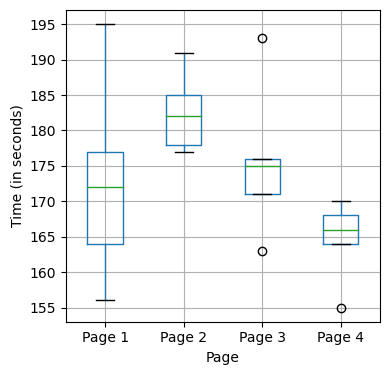

In [15]:
four_sessions = pd.read_csv('../data/four_sessions.csv')

ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [16]:
print(pd.read_csv('../data/four_sessions.csv').head())

     Page  Time
0  Page 1   164
1  Page 2   178
2  Page 3   175
3  Page 4   155
4  Page 1   172


In [17]:
# 순열검정 시행
observed_variance = four_sessions.groupby('Page').mean().var().iloc[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var().iloc[0]

print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
25.986666666666697


Pr(Prob) 0.08


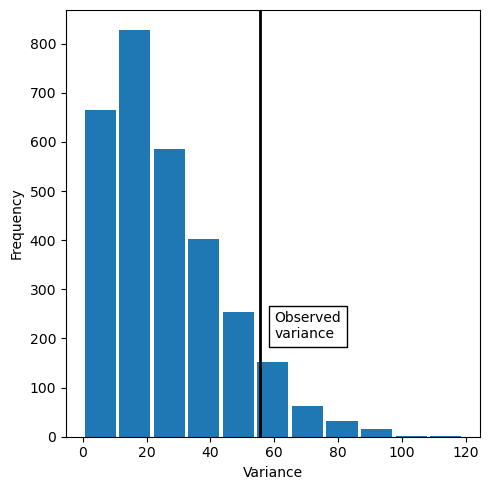

In [18]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

네 페이지 사이의 응답률이 8.0% 정도의 확률로, 실제 관측값과 달라지는 경우가 우연히 발생할 수 있다. 이러한 비개연성의 정도가 통상적 임계치인 5%에 미치지 못하므로 네 페이지 간의 차이가 우연히 발생할 수 있다고, 즉 통계적으로 유의미하지 않다고 말할 수 있다.

### A. F 통계량
---
- 잔차 오차(residual error)로 인한 분산과 그룹 평균(처리 효과)의 분산에 대한 비율을 기초로 함
- 이 비율이 높을수록 통계적으로 유의하다고 할 수 있음

In [19]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()

aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


In [20]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time,
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

F-Statistic: 1.3699
p-value: 0.0388


- df: 자유도
- sum_sq: 제곱합
- mean_sq: 평균제곱(평균제곱편차)
- F: F 통계량

[one-way ANOVA table](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1888/2017/05/11171329/8636.png)

### B. 이원 분산분석

[two-way ANOVA table](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1888/2017/05/11171421/098_fmt.png)	 

## 9. 카이제곱검정
---
- 횟수 관련 데이터에서 주로 사용
- 예상되는 분포에 <ins>얼마나 잘 맞는지</ins> 검정
- 일반적으로 <ins>변수 간 독립성</ins>에 대한 귀무가설의 타당성 평가를 위해 $r×c$ 분할표를 함께 사용
- $r$=row $c$=column
---
- **카이제곱 통계량(chi-square statistic)**: *기댓값으로부터 어떤 관찰값까지의 거리*를 나타내는 특정치
- **기댓값(expectation, expected)**: 어떤 가정(보통 귀무가설)으로부터 데이터가 발생할 때, 그에 대해 기대하는 정도

- 피어슨 잔차(Pearson residual): $R={{관측값 - 기댓값} \over \sqrt{기댓값}}$
- 카이제곱 통계량 = 피어슨 잔차들의 제곱합: $\Chi=\sum _i^r \sum _j^c R^2$

### A. 재표본추출 방법

In [21]:
# Table 3-4
click_rate = pd.read_csv('../data/click_rates.csv')
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
print(clicks)

Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988


In [22]:
# Table 3-5
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [23]:
# Resampling approach
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4660


### B. 통계적 이론
---
$자유도=(r-1)×(c-1)$

In [24]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


재표본추출로 얻은 값보다 약간 작은데, 카이제곱분포는 실제 통계 분포가 아니라 근사치이기 때문이다.

### C. 피셔의 정확검정
---
발생할 수 있는 모든 순열을 계산한다.

파이썬은 쉽게 사용할 수 있도록 구현해놓은 것이 없다. <br>
R에서는 재표본추출로 얻은 p 값과 아주 가깝다고 한다.


### D. 데이터 과학과의 관련성

## 10. 멀티암드 밴딧 알고리즘
---
- **MAB(multi-armed bandit)**: 각기 다른 수익을 가져다주는 (고객이 선택할 수 있는) 손잡이가 여러 개인 가상의 슬롯머신으로, 다중 처리 실험에 대한 비유로 볼 수 있음
- **손잡이(arm)**: 실험에서 어떤 하나의 처리
    - 예시 - 웹 테스트에서 헤드라인 A
- **상금=수익(win)**: 슬롯머신으로 딴 상금에 대한 실험적 비유
    - 예시 - 고객들의 링크 클릭 수

```
※ 전통적인 A/B test의 어려움

1. 결론을 내리기 어려움
실험 결과를 통해 효과가 있다는 것을 유추할 수는 있지만, 이를 입증할 만한 크기의 표본이 없을 수 있음

2. 실험이 끝나기 전에 이미 얻은 결과 이용

3. 마음을 바꿔서 실험 종료 후 추가되는 데이터를 바탕으로 다른 것을 시도하고 싶을 수 있음
```

- 엡실론-그리디 알고리즘(epsilon-greedy algorithm)
    1. 0과 1 사이의 값으로 아주 작은 엡실론($\epsilon$=epsilon) 설정
    1. 0부터 1 사이의 균등분포의 난수 생성
    1. 이 숫자가 0과 엡실론 사이에 존재하면 50/50의 확률로 동전 뒤집기 시행
        1. 동전이 앞면이면 제안 A 표시
        1. 동전이 뒷면이면 제안 B 표시
    1. 숫자가 엡실론보다 크면, 지금까지 가장 좋은 결과를 보인 제안 표시
- 톰슨의 샘플링
    - 베타 분포(베이즈 문제에서 사전 정보를 지정하는 일반적 메커니즘) 사용

## 11. 검정력과 표본크기
---
- **효과크기(effect size)**: 통계 검정을 통해 판단할 수 있는 효과의 최소 크기
- **검정력(power)**: 주어진 표본크기로 주어진 효과크기를 알아낼 확률
- **유의수준(significance level)**: 검정 시 사용할 통계 유의수준

### A. 표본크기

```
가설검정의 4대 요소

1. 표본크기
2. 탐지하고자 하는 효과크기
3. 가설검정을 위한 유의수준
4. 검정력

이 중 3가지를 정하면 나머지 하나를 알 수 있고, 일반적으로 표본크기를 알고 싶은 경우가 많음
```

In [25]:
# 표본크기 계산

In [26]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size,
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


In [27]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size,
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408
